In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\Python\Intellipaat Quiz_Certification\Linear-regression-2\housing.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


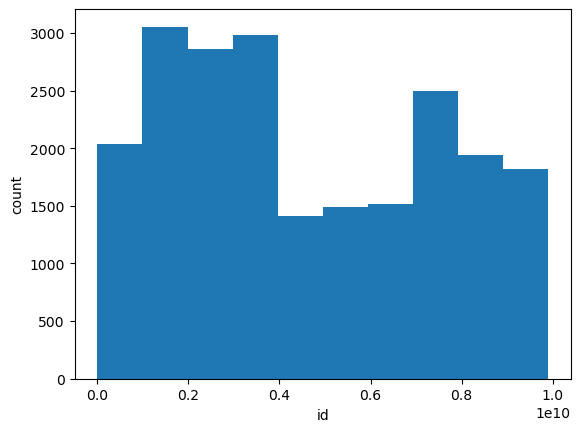

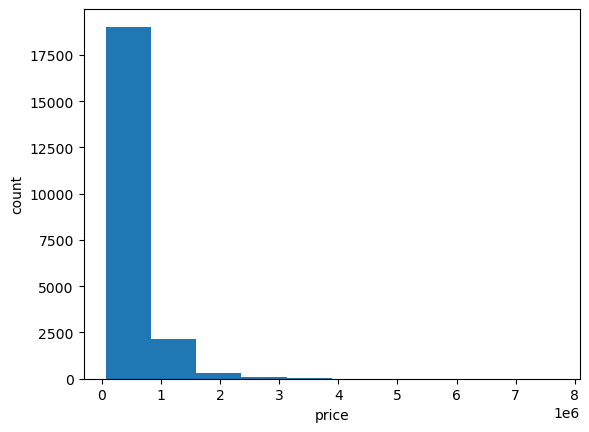

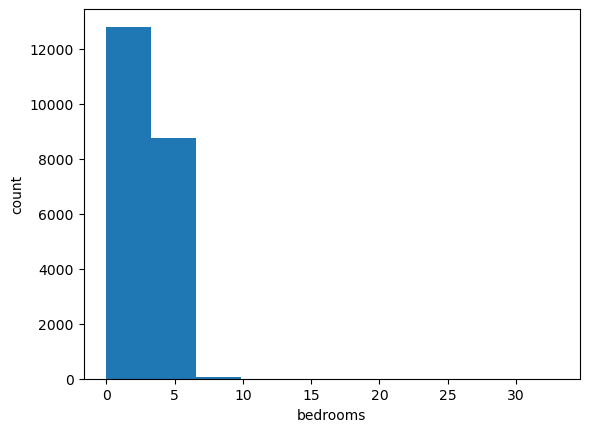

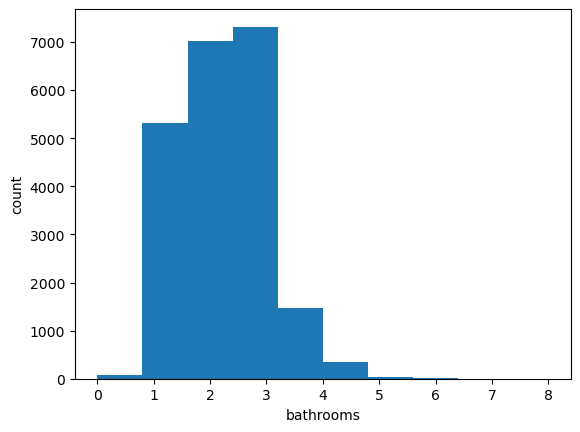

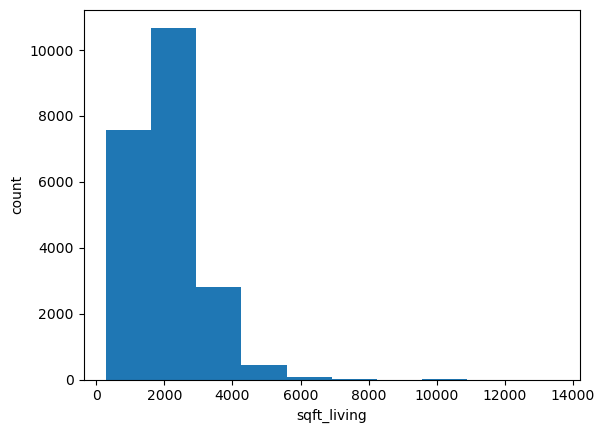

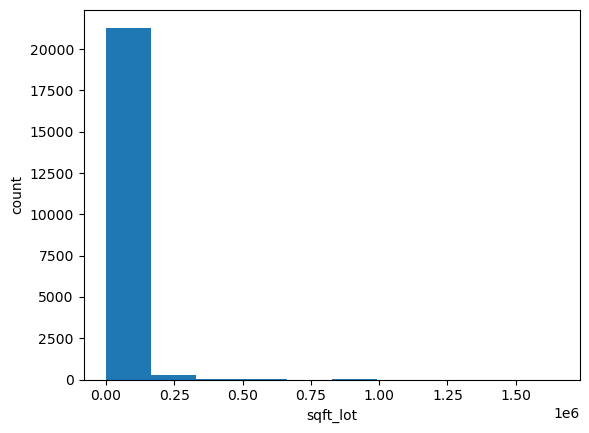

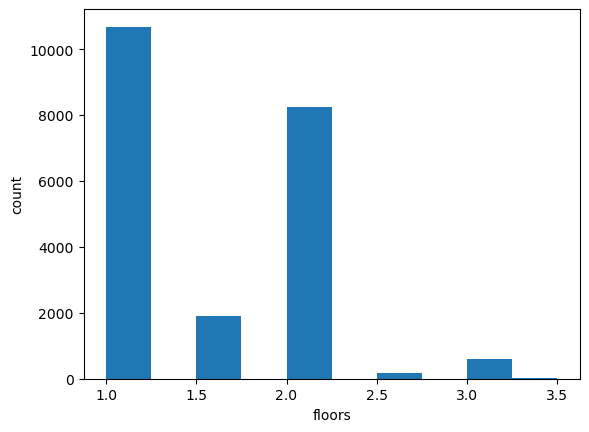

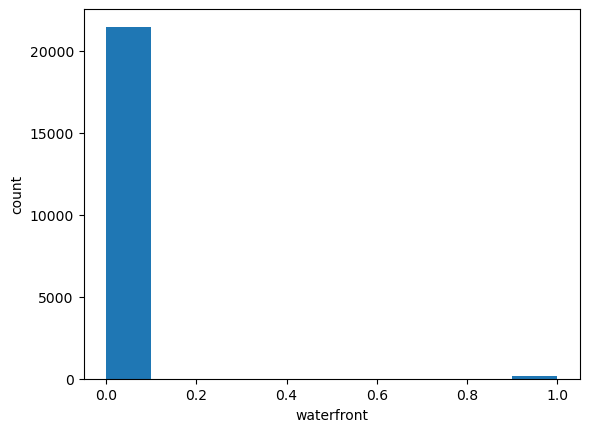

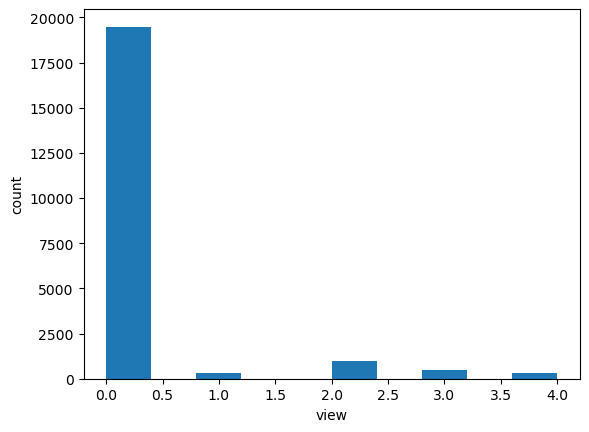

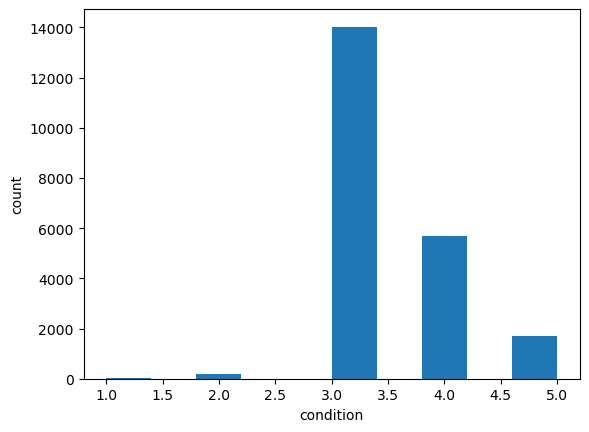

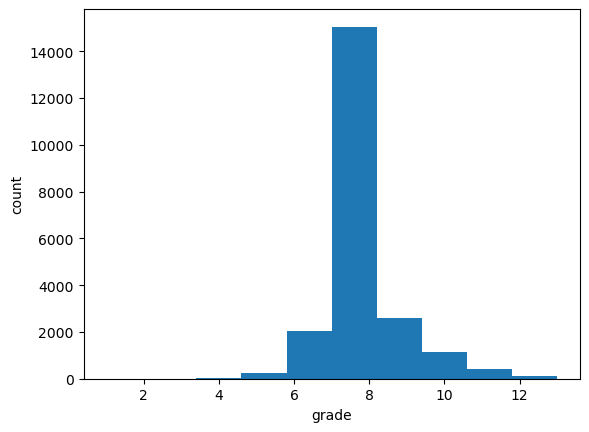

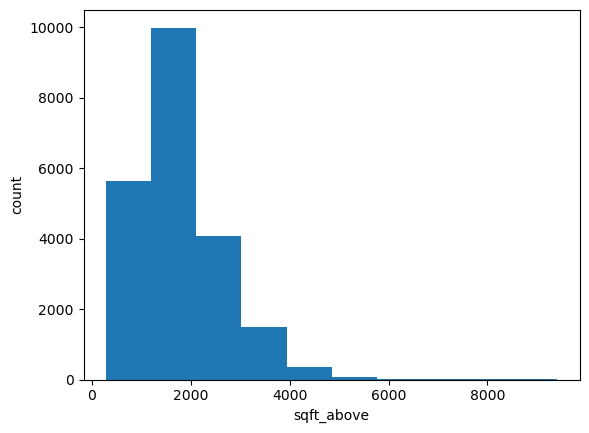

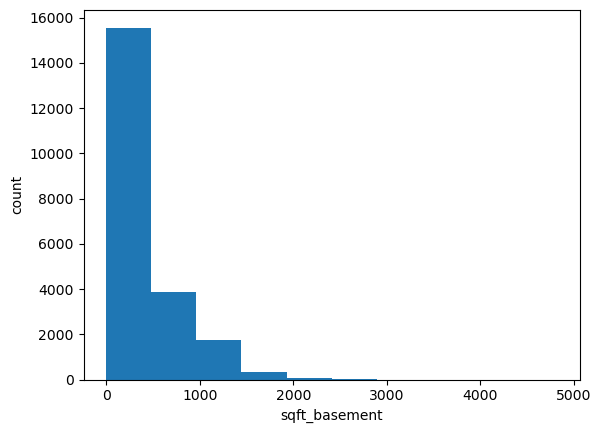

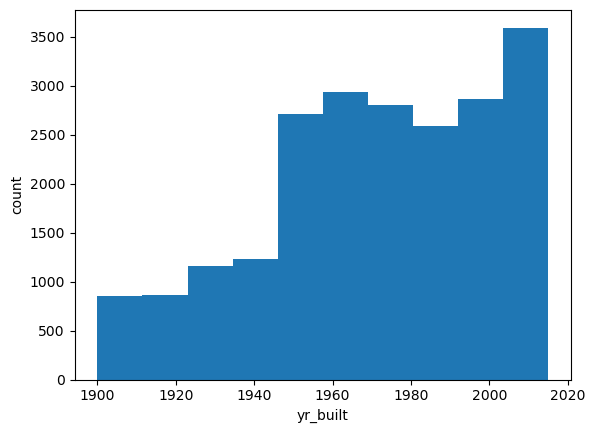

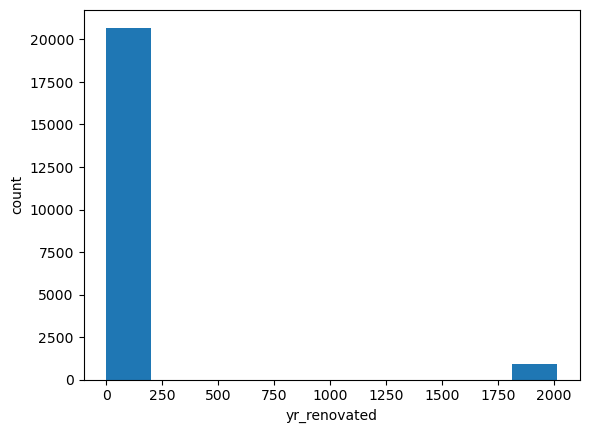

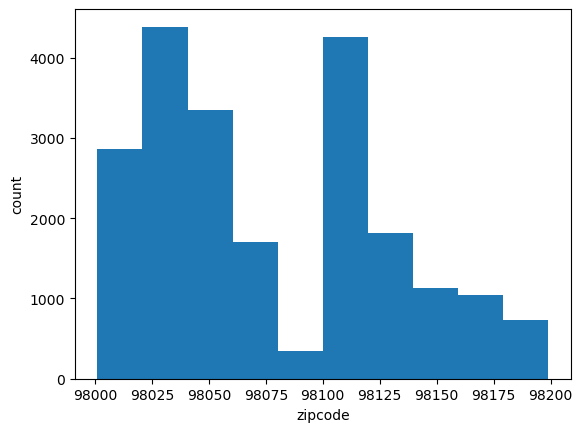

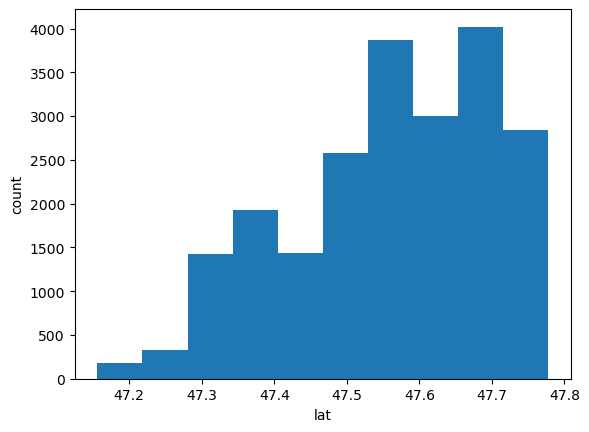

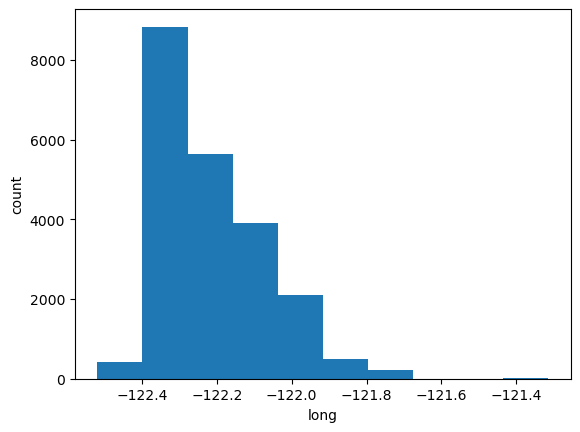

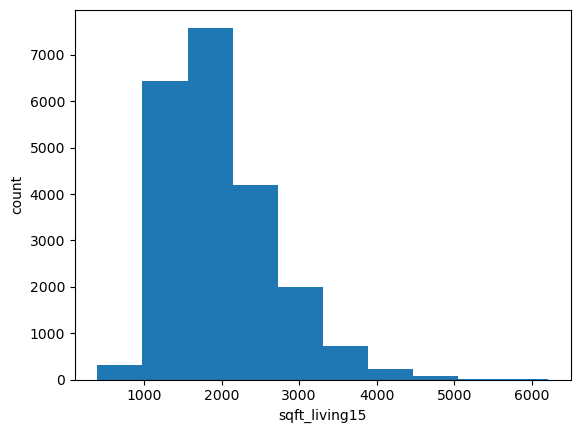

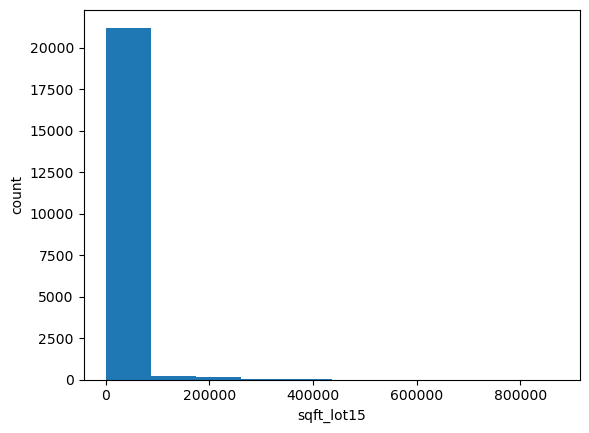

In [3]:
for i in df.columns:
    if((df[i].dtypes== 'float64') or (df[i].dtypes == 'int64')):
        plt.hist(df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

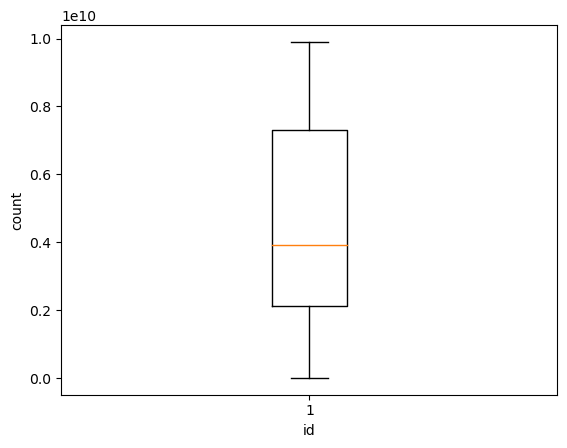

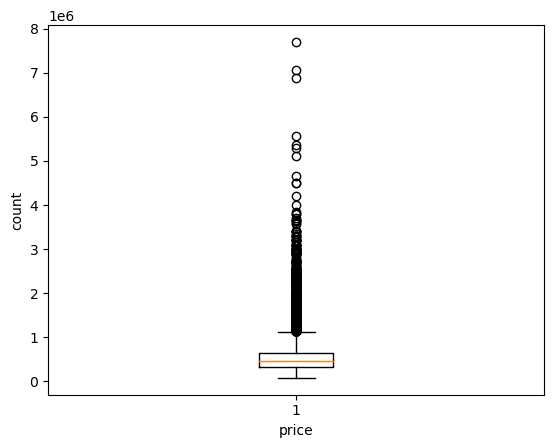

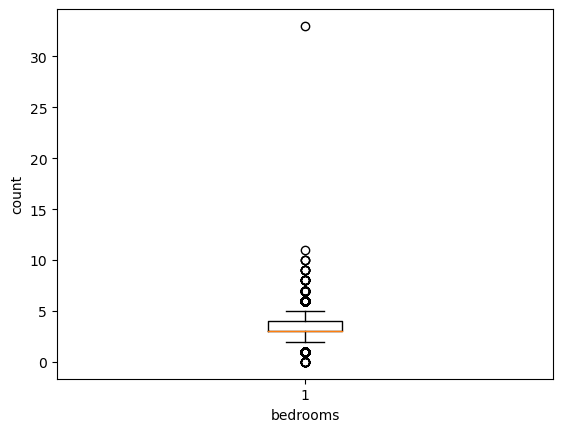

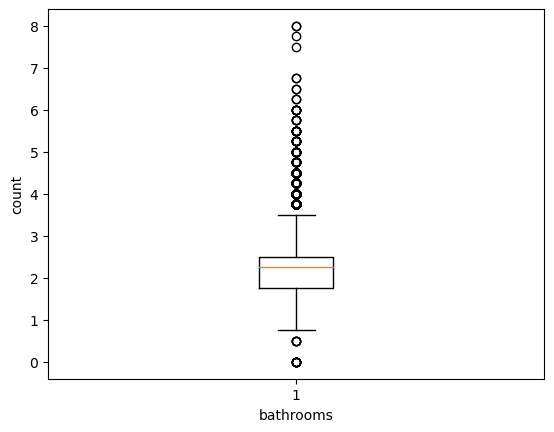

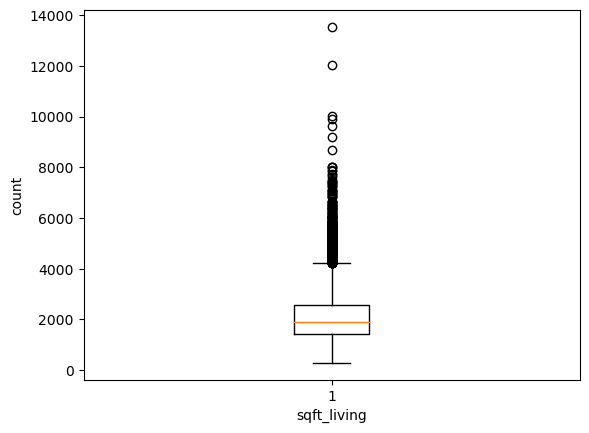

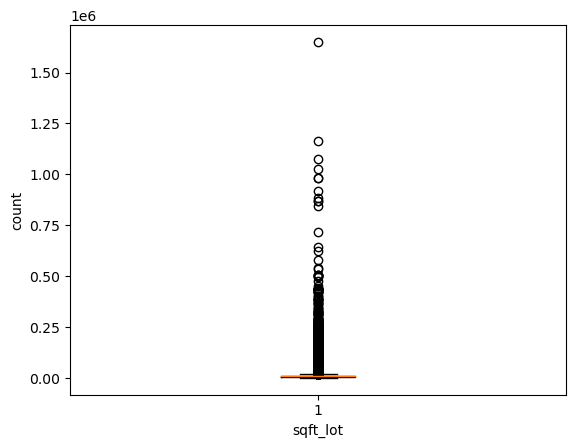

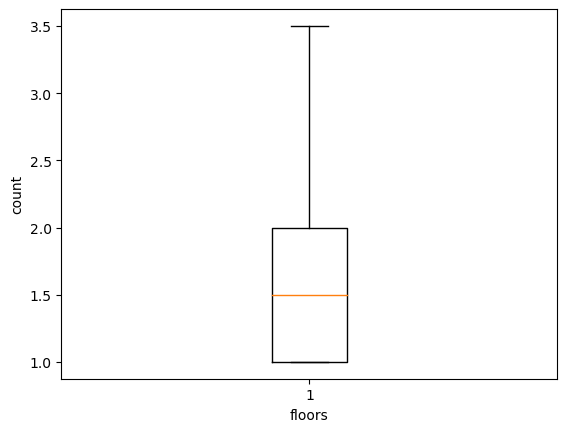

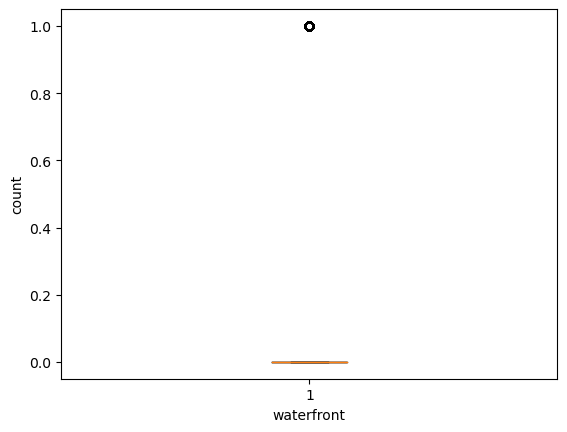

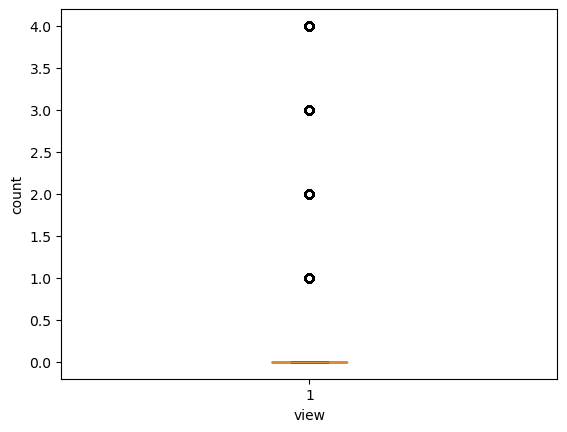

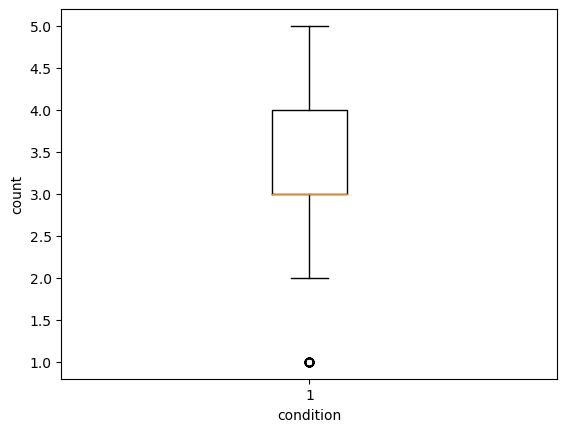

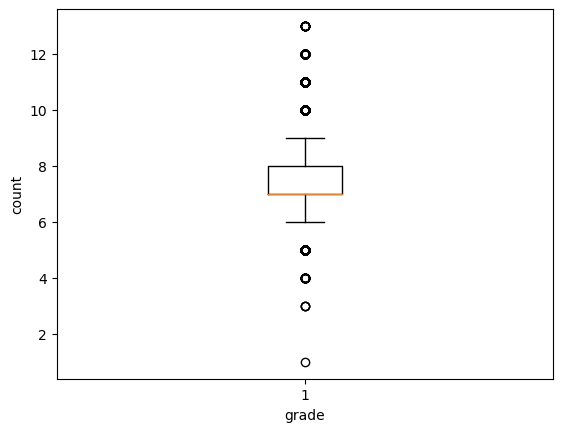

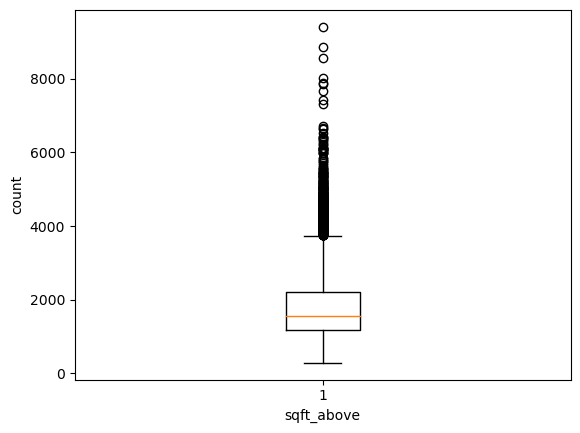

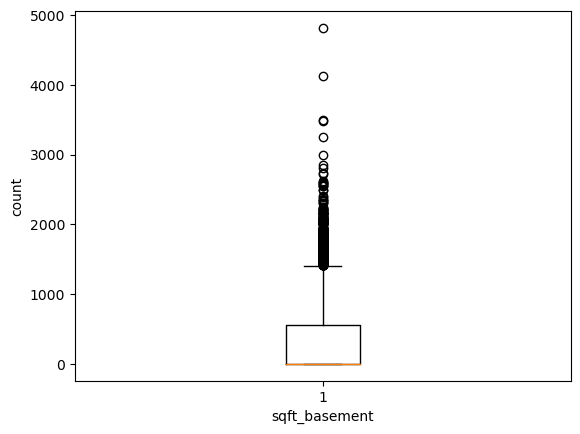

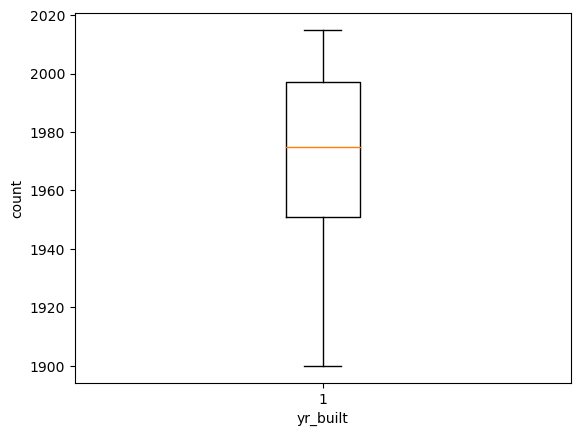

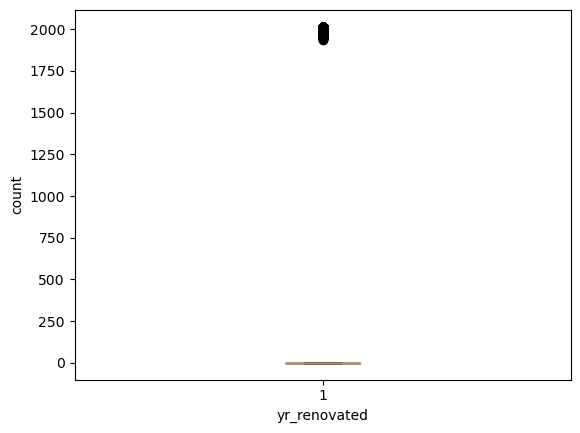

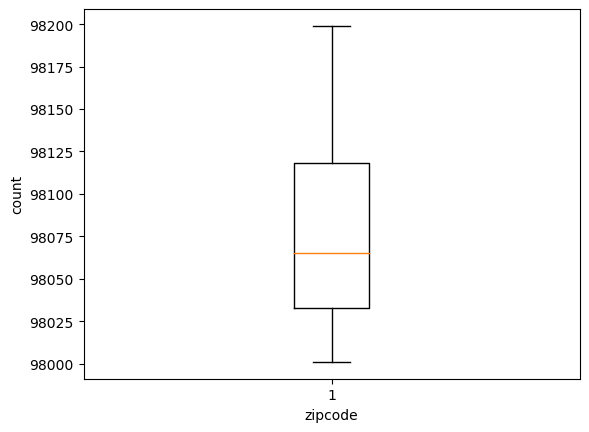

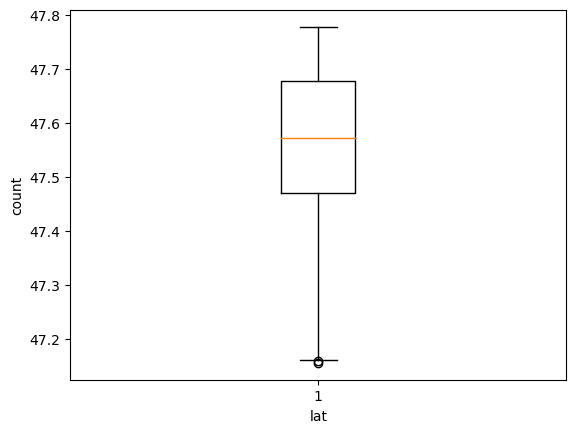

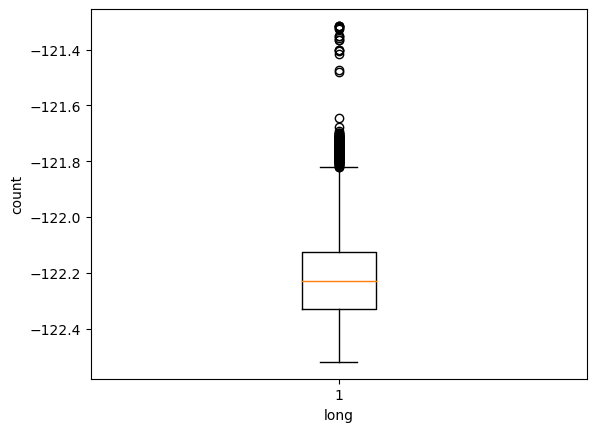

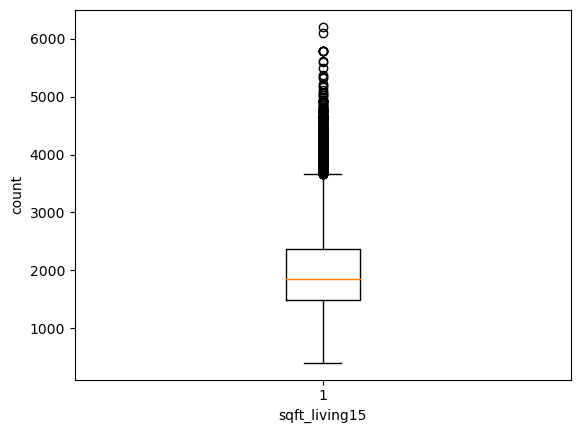

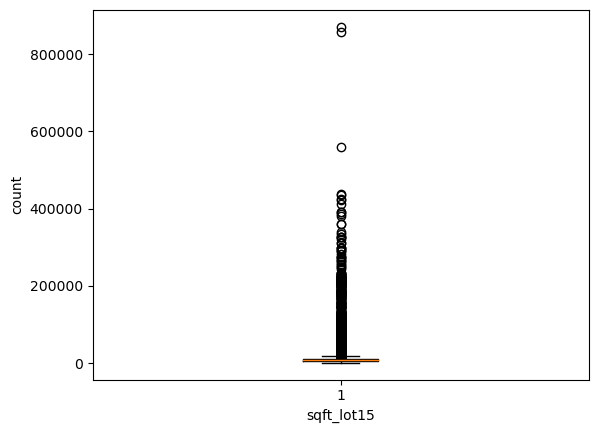

In [5]:
for i in df.columns:
    if ((df[i].dtypes =='int64') or (df[i].dtypes == 'float64')):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [6]:
df.shape

(21613, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
col = list(df.columns)
col

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [14]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [15]:
# Feature Selection -  To see which columns to pass model and which one to drop
# VIF - Variance Inflation factor
# Works with multi colinearity
# Relation between multiple corelation between variables

In [16]:
# VIF = 1, Variables are not related
# VIF (1-6), Variables are moderately acceptable, acceptable
# VIF >6, Variables are highly correlated ( Drop those columns)
# x - independed column
# y - dependent column (Target Variable)
# multi colinearity is 5 or 6

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

In [18]:
col_list

['id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [19]:
X = df[col_list]
X

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [20]:
X.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
#To Get only values, write X.values to extract only values and not column names
X.values

array([[ 7.12930052e+09,  3.00000000e+00,  1.00000000e+00, ...,
        -1.22257000e+02,  1.34000000e+03,  5.65000000e+03],
       [ 6.41410019e+09,  3.00000000e+00,  2.25000000e+00, ...,
        -1.22319000e+02,  1.69000000e+03,  7.63900000e+03],
       [ 5.63150040e+09,  2.00000000e+00,  1.00000000e+00, ...,
        -1.22233000e+02,  2.72000000e+03,  8.06200000e+03],
       ...,
       [ 1.52330014e+09,  2.00000000e+00,  7.50000000e-01, ...,
        -1.22299000e+02,  1.02000000e+03,  2.00700000e+03],
       [ 2.91310100e+08,  3.00000000e+00,  2.50000000e+00, ...,
        -1.22069000e+02,  1.41000000e+03,  1.28700000e+03],
       [ 1.52330016e+09,  2.00000000e+00,  7.50000000e-01, ...,
        -1.22299000e+02,  1.02000000e+03,  1.35700000e+03]])

In [24]:
for i in range(len(X.columns)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [25]:
# To get VIF, we only need to pass values 
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

c:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         Features       VIF
0              id  3.631516
1        bedrooms  1.646296
2       bathrooms  3.350310
3     sqft_living       inf
4        sqft_lot  2.104055
5          floors  1.951001
6      waterfront  1.203729
7            view  1.420035
8       condition  1.220353
9           grade  3.394319
10     sqft_above       inf
11  sqft_basement       inf
12       yr_built  2.128890
13   yr_renovated  1.144733
14        zipcode  0.486697
15            lat  1.180261
16           long  1.810062
17  sqft_living15  2.882937
18     sqft_lot15  2.142654


In [26]:
df = df.drop(['sqft_living', 'sqft_above', 'sqft_basement'], axis=1)

In [27]:
# Check VIF again
col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         Features       VIF
0              id  3.630892
1        bedrooms  1.454387
2       bathrooms  2.690061
3        sqft_lot  2.095225
4          floors  1.590984
5      waterfront  1.200622
6            view  1.368062
7       condition  1.215717
8           grade  2.874640
9        yr_built  2.062937
10   yr_renovated  1.144715
11        zipcode  0.469365
12            lat  1.162040
13           long  1.758837
14  sqft_living15  2.380361
15     sqft_lot15  2.136103


In [28]:
df = df.drop(['zipcode'], axis=1)

In [29]:
# Check VIF again
col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         Features       VIF
0              id  3.621143
1        bedrooms  1.453459
2       bathrooms  2.679873
3        sqft_lot  2.080111
4          floors  1.589755
5      waterfront  1.200558
6            view  1.367075
7       condition  1.215049
8           grade  2.796009
9        yr_built  1.823815
10   yr_renovated  1.139682
11            lat  1.013449
12           long  0.176440
13  sqft_living15  2.302140
14     sqft_lot15  2.119485


In [30]:
df = df.drop(['long'], axis=1)

In [31]:
# Check VIF again
col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         Features       VIF
0              id  3.621017
1        bedrooms  1.444858
2       bathrooms  2.658112
3        sqft_lot  2.079688
4          floors  1.579328
5      waterfront  1.200294
6            view  1.347753
7       condition  1.192889
8           grade  2.763607
9        yr_built  1.614023
10   yr_renovated  1.128638
11            lat  0.061325
12  sqft_living15  2.279203
13     sqft_lot15  2.118990


In [32]:
df = df.drop(['lat'], axis=1)

In [33]:
# Check VIF again
col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         Features         VIF
0              id    3.621017
1        bedrooms    1.424068
2       bathrooms    2.391740
3        sqft_lot    2.079636
4          floors    1.526756
5      waterfront    1.200023
6            view    1.328078
7       condition    1.044466
8           grade    2.763499
9        yr_built  104.891033
10   yr_renovated    1.020489
11  sqft_living15    2.276775
12     sqft_lot15    2.113553


In [34]:
df = df.drop(['yr_built'], axis=1)

In [35]:
# Check VIF again
col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         Features        VIF
0              id   3.519626
1        bedrooms  19.323816
2       bathrooms  19.489832
3        sqft_lot   2.356176
4          floors  12.789609
5      waterfront   1.208988
6            view   1.421432
7       condition  19.202045
8           grade  69.342250
9    yr_renovated   1.064169
10  sqft_living15  20.496207
11     sqft_lot15   2.572338


In [36]:
df = df.drop(['grade'], axis=1)

In [37]:
# Check VIF again
col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         Features        VIF
0              id   3.437006
1        bedrooms  18.936928
2       bathrooms  18.558318
3        sqft_lot   2.353361
4          floors  10.396694
5      waterfront   1.208985
6            view   1.421432
7       condition  11.926927
8    yr_renovated   1.061816
9   sqft_living15  14.763762
10     sqft_lot15   2.572301


In [38]:
df = df.drop(['bathrooms'], axis=1)

In [39]:
# Check VIF again
col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        Features        VIF
0             id   3.436699
1       bedrooms  15.956507
2       sqft_lot   2.351087
3         floors   8.342102
4     waterfront   1.208952
5           view   1.413322
6      condition  11.806779
7   yr_renovated   1.059318
8  sqft_living15  12.727924
9     sqft_lot15   2.572211


In [40]:
df = df.drop(['bedrooms'], axis=1)

In [41]:
# Check VIF again
col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        Features        VIF
0             id   3.425002
1       sqft_lot   2.350582
2         floors   7.914794
3     waterfront   1.207373
4           view   1.409750
5      condition   8.918895
6   yr_renovated   1.055919
7  sqft_living15  10.330222
8     sqft_lot15   2.569794


In [42]:
df = df.drop(['sqft_living15'], axis= 1)

In [43]:
# Check VIF again
col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

       Features       VIF
0            id  3.394546
1      sqft_lot  2.349905
2        floors  5.929754
3    waterfront  1.205775
4          view  1.323102
5     condition  7.061112
6  yr_renovated  1.055874
7    sqft_lot15  2.523196


In [44]:
df = df.drop(['condition'], axis=1)

In [45]:
# Check VIF again
col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

       Features       VIF
0            id  2.792747
1      sqft_lot  2.348931
2        floors  3.081194
3    waterfront  1.205457
4          view  1.317518
5  yr_renovated  1.055456
6    sqft_lot15  2.493319


In [46]:
df = df.drop(['id'], axis=1)

In [47]:
# Check VIF again
col_list= []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data
vif_data["Features"]= X.columns
vif_data["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

       Features       VIF
0      sqft_lot  2.345436
1        floors  1.282650
2    waterfront  1.204955
3          view  1.313838
4  yr_renovated  1.055303
5    sqft_lot15  2.493252


In [49]:
df.columns

Index(['date', 'price', 'sqft_lot', 'floors', 'waterfront', 'view',
       'yr_renovated', 'sqft_lot15'],
      dtype='object')

In [50]:
# Divide data into x and y for model building
x = df.loc[:, ['sqft_lot', 'floors', 'waterfront', 'view', 'yr_renovated', 'sqft_lot15']]
y = df.loc[:,['price']]

In [51]:
x

,sqft_lot,floors,waterfront,view,yr_renovated,sqft_lot15
0,5650,1.0,0,0,0,5650
1,7242,2.0,0,0,1991,7639
2,10000,1.0,0,0,0,8062
3,5000,1.0,0,0,0,5000
4,8080,1.0,0,0,0,7503
...,...,...,...,...,...,...
21608,1131,3.0,0,0,0,1509
21609,5813,2.0,0,0,0,7200
21610,1350,2.0,0,0,0,2007
21611,2388,2.0,0,0,0,1287


In [52]:
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
#Split data into train and test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 6)
(17290, 1)
(4323, 6)
(4323, 1)


In [56]:
#Build Linear Model 
l_model = LinearRegression()
l_model

LinearRegression()

In [57]:
l_model.fit(x_train,y_train)

LinearRegression()

In [59]:
predictions = l_model.predict(x_test)
predictions

array([[568459.65509428],
       [405635.65751176],
       [882799.82935945],
       ...,
       [565452.34890651],
       [408082.4738487 ],
       [569508.44512451]])

In [60]:
error_pred = pd.DataFrame(columns=('Actual_data', 'Predicted_data'))
error_pred

,Actual_data,Predicted_data


In [61]:
error_pred['Actual_data'] = y_test
error_pred['Predicted_data'] = predictions
error_pred['Error'] = error_pred['Actual_data'] - error_pred['Predicted_data']
error_pred

,Actual_data,Predicted_data,Error
735,365000,568459.655094,-203459.655094
2830,865000,405635.657512,459364.342488
4106,1038000,882799.829359,155200.170641
16218,1490000,885627.972771,604372.027229
19964,711000,565904.553435,145095.446565
...,...,...,...
13674,338000,406424.886937,-68424.886937
20377,673000,564802.977766,108197.022234
8805,285000,565452.348907,-280452.348907
10168,605000,408082.473849,196917.526151


In [62]:
error_pred.shape

(4323, 3)

In [64]:
from sklearn.metrics import *

In [65]:
# To check accuracy we need to check r2 square
r2_on_test_data = r2_score(y_test, predictions)
r2_on_test_data

0.25930127037090145

    25.9% Accuracy